In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [239]:
orders = pd.read_csv('datasets-2/data_orders.csv')
offers = pd.read_csv('datasets-2/data_offers.csv')
orders['order_datetime']=pd.to_datetime(orders['order_datetime'])
print(orders.shape,offers.shape)

/var/folders/cf/fjb92b0918nc2t9gbstsxh_m0000gp/T/ipykernel_850/480720021.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders['order_datetime']=pd.to_datetime(orders['order_datetime'])


(10716, 8) (334363, 2)


In [240]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,2024-10-19 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,2024-10-19 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,2024-10-19 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,2024-10-19 13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,2024-10-19 21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [246]:
orders['no_of_orders'] = pd.Series([len(offers[offers['order_gk']==id]) for id in orders['order_gk']])

In [247]:
notassn = orders[orders['is_driver_assigned_key']==0]
assn = orders[orders['is_driver_assigned_key']==1]

In [242]:
nfailed = np.array([len(notassn),len(assn)])

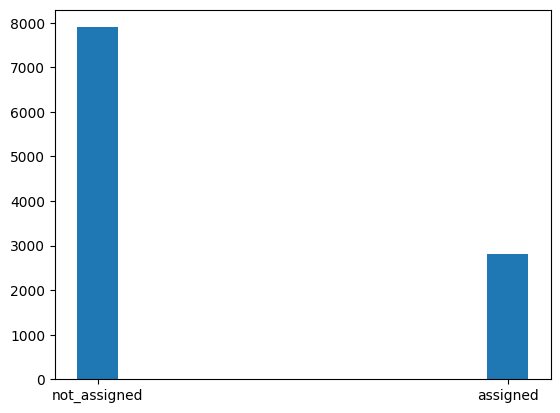

In [243]:
plt.bar(['not_assigned','assigned'],nfailed,width=0.1)
plt.show()

In [244]:
print(notassn['cancellations_time_in_seconds'].describe())
print(assn['cancellations_time_in_seconds'].describe())

count    4496.000000
mean      110.371441
std       120.676021
min         3.000000
25%        38.000000
50%        88.000000
75%       157.000000
max      4097.000000
Name: cancellations_time_in_seconds, dtype: float64
count    2811.000000
mean      233.897901
std       292.709718
min         6.000000
25%        54.000000
50%       127.000000
75%       296.000000
max      4303.000000
Name: cancellations_time_in_seconds, dtype: float64


In [278]:
orders[orders['order_status_key']==9]['cancellations_time_in_seconds'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: cancellations_time_in_seconds, dtype: float64

In [291]:
orders[(orders['is_driver_assigned_key']==0) & (orders['order_status_key']==4)]

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,no_of_orders
1,2024-10-19 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3
9,2024-10-19 06:33:52,-0.976216,51.433202,NaN,3000582765616,4,0,78.0,1
10,2024-10-19 15:40:15,-0.934670,51.447065,NaN,3000582991062,4,0,167.0,8
11,2024-10-19 20:59:35,-0.972735,51.452489,NaN,3000583116472,4,0,45.0,3
12,2024-10-19 06:25:31,-0.958791,51.459481,NaN,3000582765488,4,0,79.0,2
...,...,...,...,...,...,...,...,...,...
10709,2024-10-19 12:44:11,-0.975372,51.457846,NaN,3000597886155,4,0,43.0,1
10710,2024-10-19 12:42:52,-0.975372,51.457846,NaN,3000597886140,4,0,44.0,1
10711,2024-10-19 13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,1
10712,2024-10-19 13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0,0


In [290]:
orders[(orders['is_driver_assigned_key']==1) & (orders['cancellations_time_in_seconds'].isna())]

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,no_of_orders
1158,2024-10-19 16:49:55,-0.974337,51.465422,418.0,3000631256425,9,1,NaN,0
6881,2024-10-19 00:44:03,-0.973348,51.453919,60.0,3000630156338,9,1,NaN,1
7968,2024-10-19 00:12:02,-0.974735,51.454823,298.0,3000600112433,9,1,NaN,3


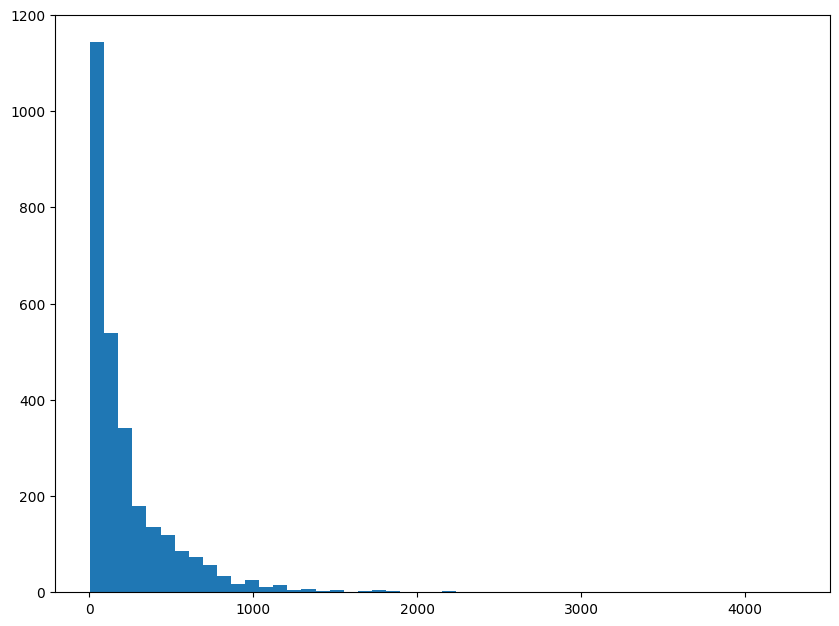

In [207]:
plt.figure(figsize=(10,7.5))
plt.hist(assn['cancellations_time_in_seconds'],bins=50)
plt.show()

In [248]:
waitratio=assn['cancellations_time_in_seconds']/assn['m_order_eta']

In [249]:
waitratio.describe()

count    2811.000000
mean        1.038561
std         2.297841
min         0.013915
25%         0.127119
50%         0.321561
75%         1.140080
max        61.616667
dtype: float64

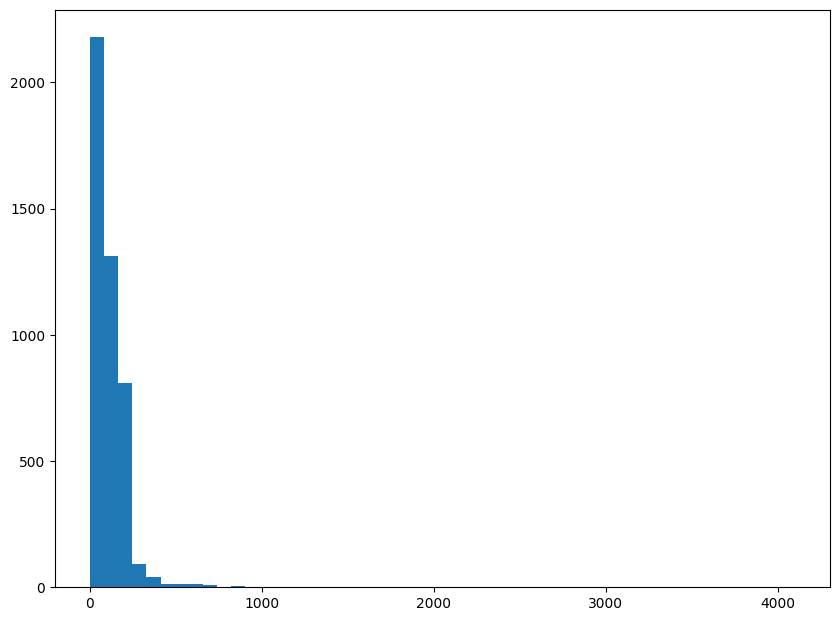

In [250]:
plt.figure(figsize=(10,7.5))
plt.hist(notassn['cancellations_time_in_seconds'],bins=50)
plt.show()

In [251]:
notassn = notassn.drop(notassn.query('cancellations_time_in_seconds>1000').index)
assn = assn.drop(assn.query('cancellations_time_in_seconds>1500').index)

In [252]:
avgcanceltimes1= np.array([assn[(assn['order_datetime']>= pd.to_datetime('%d:00:00'%(i))) & (assn['order_datetime']<=pd.to_datetime('%d:59:59'%(i)))]['cancellations_time_in_seconds'].mean() for i in range(24)])
avgcanceltimes0= np.array([notassn[(notassn['order_datetime']>= pd.to_datetime('%d:00:00'%(i))) & (notassn['order_datetime']<=pd.to_datetime('%d:59:59'%(i)))]['cancellations_time_in_seconds'].mean() for i in range(24)])

In [260]:
hours = ['%d-%d'%(i,i+1) for i in range(24)]

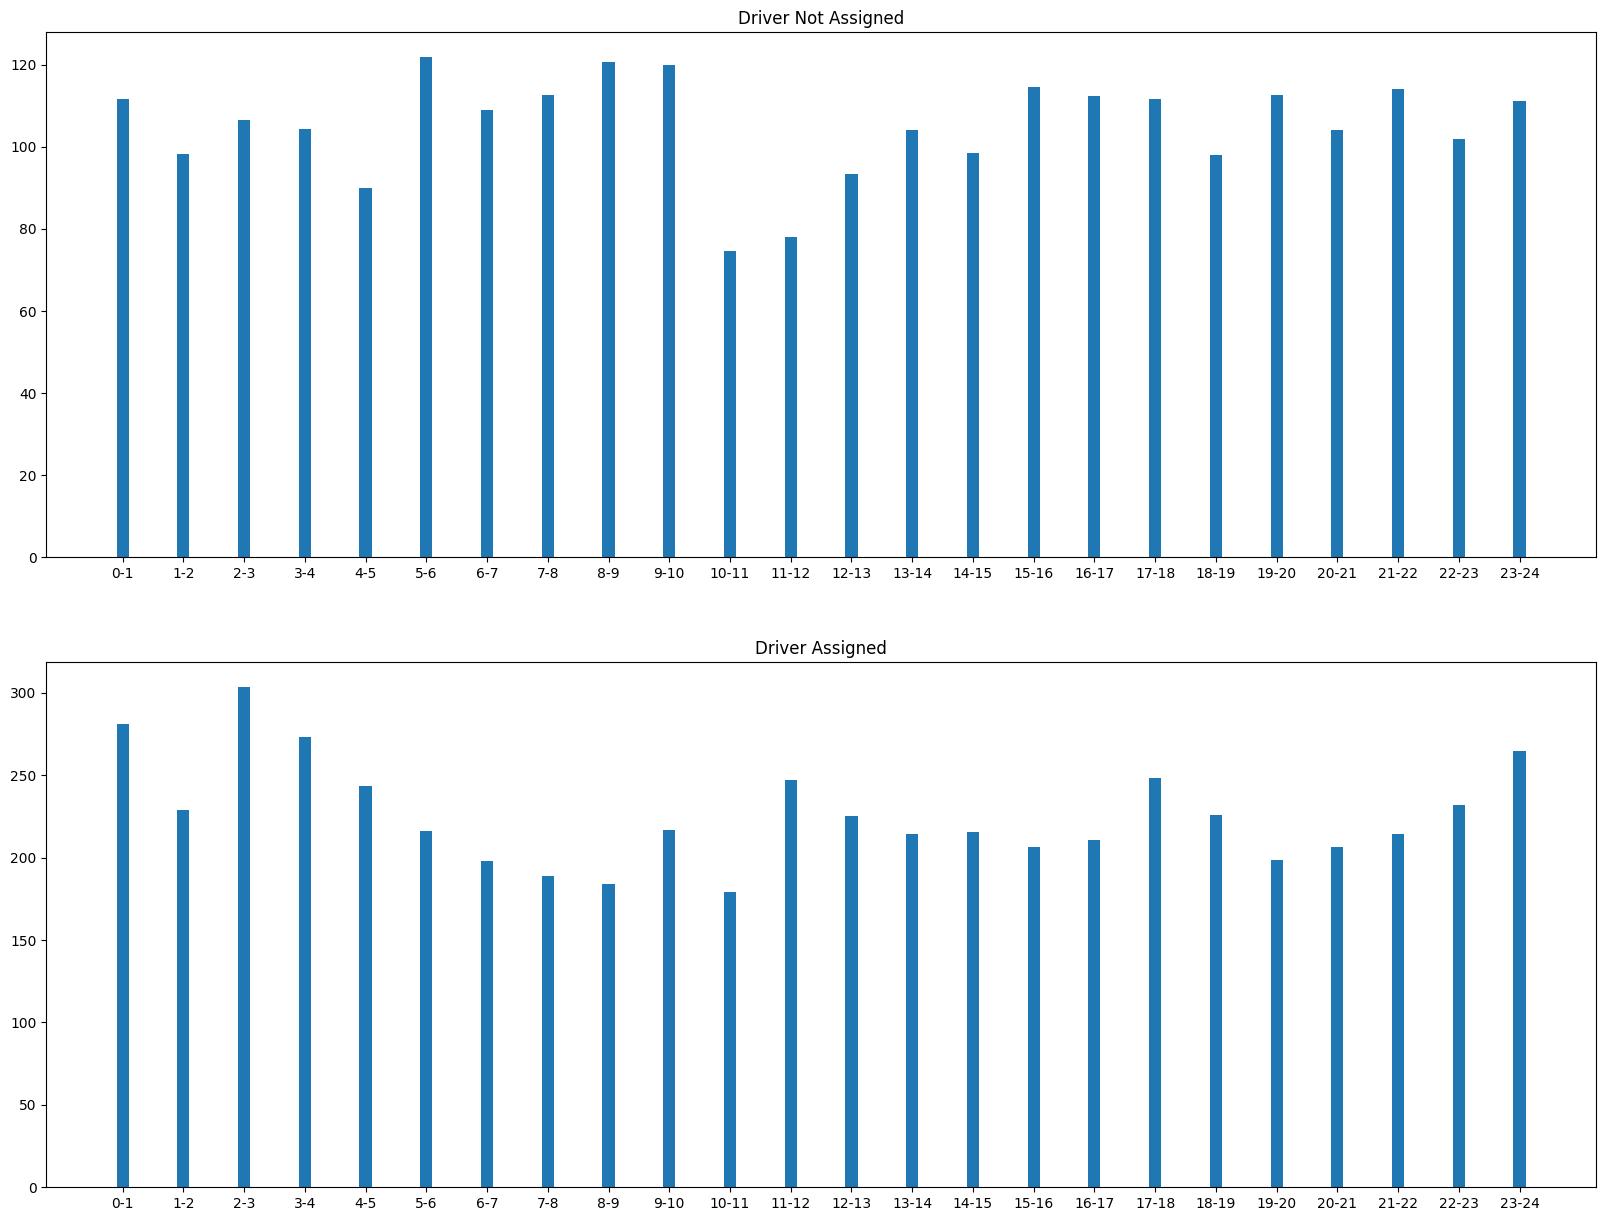

In [261]:
f,ax = plt.subplots(nrows=2,ncols=1,figsize=(20,15))
ax[0].bar(hours,avgcanceltimes0,width=0.2)
ax[0].set_title('Driver Not Assigned')
ax[1].bar(hours,avgcanceltimes1,width= 0.2)
ax[1].set_title('Driver Assigned')
plt.show()

In [256]:
avgeta = np.array([assn[(assn['order_datetime']>= pd.to_datetime('%d:00:00'%(i))) & (assn['order_datetime']<=pd.to_datetime('%d:59:59'%(i)))]['m_order_eta'].mean() for i in range(24)])

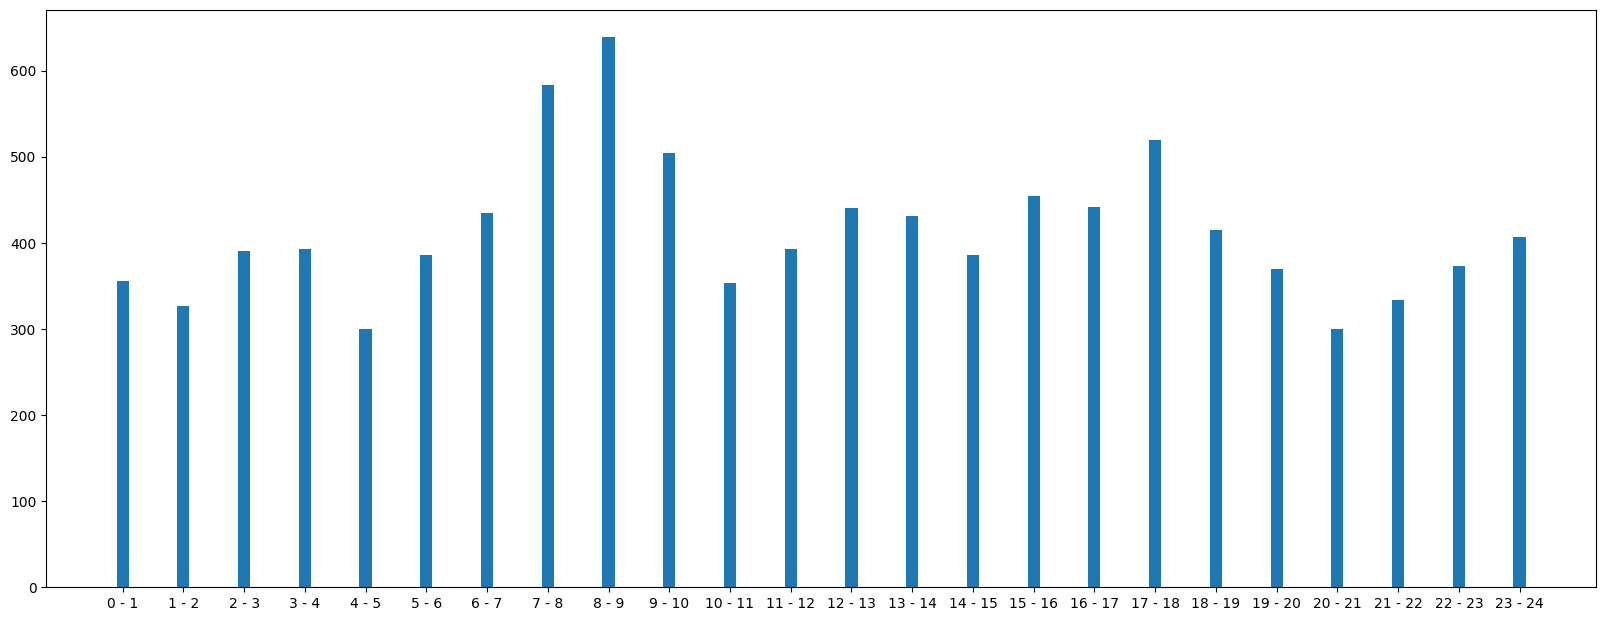

In [257]:
plt.figure(figsize=(20,7.5))
plt.bar(hours,avgeta,width = 0.2)
plt.show()

In [258]:
assn['no_of_orders'].describe()

count    2797.000000
mean        2.971398
std         2.536128
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: no_of_orders, dtype: float64

In [259]:
assn['m_order_eta'].corr(assn['cancellations_time_in_seconds'])

-0.03972730227363152